Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [1]:
import csv

## Longer version of code
# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = csv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

## Short version of code

with open('enrollments.csv', 'rb') as f:
    reader = csv.DictReader(f)
    enrollments = list(reader)


In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

daily_engagement = None
project_submissions = None
with open('daily_engagement.csv','rb') as f:
    reader = csv.DictReader(f)
    daily_engagement = list(reader)
with open('project_submissions.csv', 'rb') as f:
    reader = csv.DictReader(f)
    project_submissions = list(reader)


### Best way: define a function
- Anytime you find yourself copying and pasting code or just writing two pieces of code that are very similar, it might be a good idea to write a function instead.
- That way, if you find a bug later, you'll only have to fix it in one place.


In [4]:
import csv
def read_csv(filename):
    with open(filename,'rb') as f:
        reader = csv.DictReader(f)
        return list(reader)
enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')


In [6]:
enrollments[0]

{'account_key': '448',
 'cancel_date': '2015-01-14',
 'days_to_cancel': '65',
 'is_canceled': 'True',
 'is_udacity': 'True',
 'join_date': '2014-11-10',
 'status': 'canceled'}

In [7]:
daily_engagement[0]

{'acct': '0',
 'lessons_completed': '0.0',
 'num_courses_visited': '1.0',
 'projects_completed': '0.0',
 'total_minutes_visited': '11.6793745',
 'utc_date': '2015-01-09'}

In [8]:
project_submissions[0]

{'account_key': '256',
 'assigned_rating': 'UNGRADED',
 'completion_date': '2015-01-16',
 'creation_date': '2015-01-14',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

## Fixing Data Types

In [9]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{'account_key': '448',
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_canceled': True,
 'is_udacity': True,
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'status': 'canceled'}

In [10]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{'acct': '0',
 'lessons_completed': 0,
 'num_courses_visited': 1,
 'projects_completed': 0,
 'total_minutes_visited': 11.6793745,
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [11]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{'account_key': '256',
 'assigned_rating': 'UNGRADED',
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [12]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.


In [13]:
len(enrollments)

1640

In [14]:
enrollment_num_unique_students = set()
for enrollment in enrollments:
    enrollment_num_unique_students.add(enrollment['account_key'])
len(enrollment_num_unique_students)

1302

In [15]:
# The difference may because some students enrolled 
# and cancelled and then re-enrolled later.

In [16]:
len(daily_engagement)

136240

In [17]:
engagement_num_unique_students = set()
for engagement in daily_engagement:
    engagement_num_unique_students.add(engagement['acct'])
len(engagement_num_unique_students)

1237

In [18]:
len(project_submissions)

3642

In [19]:
submission_num_unique_students = set()
for submission in project_submissions:
    submission_num_unique_students.add(submission['account_key'])
len(submission_num_unique_students)

743

### Problems in the Data
- More unique students in enrollment than engagement table WHY? FIX?
- Column named account_key in two and acct in the third:
- Fix: change column from acct to account_key

In [20]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
# delete an item from a dictionary:
# del d[key]

In [21]:
for engagement in daily_engagement:
    engagement['account_key'] = engagement['acct']
    del[engagement['acct']]
print daily_engagement[0]['account_key']

0


### Investing the problem process:
- 1. Identify surprising data points 
- 2. Print out one or a few surprising data points

## Missing Engagement Records

In [22]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing 
#from the daily engagement table. Output that enrollment.

In [23]:
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in engagement_num_unique_students:
        print enrollment
        break
        

{'status': 'canceled', 'is_udacity': False, 'is_canceled': True, 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'account_key': '1219', 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'days_to_cancel': 0}


In [24]:
## find that: join_date = cancel_date and days_to_cancel:0
## account created and canceled at the same day didn't count 

## Checking for More Problem Records

In [25]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

In [26]:
num_missing_students = 0
for enrollment in enrollments:
    if (enrollment['account_key'] not in engagement_num_unique_students
        and enrollment['join_date'] != enrollment['cancel_date']):
        num_missing_students += 1
        print enrollment
    
num_missing_students

{'status': 'canceled', 'is_udacity': True, 'is_canceled': True, 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'account_key': '1304', 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'days_to_cancel': 59}
{'status': 'canceled', 'is_udacity': True, 'is_canceled': True, 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'account_key': '1304', 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'days_to_cancel': 99}
{'status': 'current', 'is_udacity': True, 'is_canceled': False, 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'account_key': '1101', 'cancel_date': None, 'days_to_cancel': None}


3

In [27]:
# those three are test accounts (is_udacity = True)
# Thus, we want to exclude those test accounts data from our further analysis

## Tracking Down the Remaining Problems

In [28]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [29]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [30]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

### Question: How do numbers in the daily engagement differ for students who pass the first project?
- Problems1: include data from after the project submission
- Problems2: compare data from different lengths of time
- Problems3: include data not related to first project
- Revision: Only look at engagement from first week ('days_to_cancel': None) and exclude students who cancel within a week ('days_tp_cancel' > 7)

In [32]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.


In [35]:
paid_students = {}
for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or
            enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
         # one student can enroll multiple times
         # so we need get the most recent enrollment date
        if (account_key not in paid_students or # account key not present
                enrollment_date > paid_students[account_key]): # recent
            paid_students[account_key] = enrollment_date
           
len(paid_students)

995

## Getting Data from First Week

In [49]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0
    # debug and revise "and ..."


In [50]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)


1293
134549
3618


In [51]:
paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
    if within_one_week(join_date, engagement_record_date):
         paid_engagement_in_first_week.append(engagement_record)
            
len(paid_engagement_in_first_week)

6919

In [44]:
# Note that paid students may have canceled from other courses before paying
# the suggested solution will retain records from these other enrollments.

## Exploring Student Engagement

In [52]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [53]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [54]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [ ]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

# Mean: 647.590173826
# Standard deviation: 1129.27121042
# Minimum: 0.0
# Maximum: 10568.1008673
# maximun is unusual and SD is too high -- need to debugging Codes
# mistake in within_one_week function：not exclude the multiple enrolled
# students former records

## Lessons Completed in First Week

In [55]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

In [60]:
from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week,
                                   'account_key')


In [61]:
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account,
                                             'total_minutes_visited')

In [59]:
import numpy as np

def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)

describe_data(total_minutes_by_account.values())

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


In [62]:
#  called the functions created to analyze 
# the lessons completed in the first week as follows:

In [63]:
lessons_completed_by_account = sum_grouped_items(engagement_by_account,
                                                 'lessons_completed')
describe_data(lessons_completed_by_account.values())

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [64]:
# To analyze the number of days the student visited the classrrom
# instead of how many courses they visited that day
# Since student may visit various courses
# adds up the total number of records where the number > 0

In [65]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

In [66]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [67]:
days_visited_by_account = sum_grouped_items(engagement_by_account,
                                            'has_visited')
describe_data(days_visited_by_account.values())

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [68]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.


In [70]:
subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']    

    if ((project in subway_project_lesson_keys) and
            (rating == 'PASSED' or rating == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])

print len(pass_subway_project)

passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print len(passing_engagement)
print len(non_passing_engagement)

647
4527
2392


## Comparing the Two Student Groups

In [71]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

In [73]:
passing_engagement_by_account = group_data(passing_engagement,
                                           'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,
                                               'account_key')


In [78]:
# Compare minutes spent in the classroom

In [79]:
print 'non-passing students:'
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account,
    'total_minutes_visited')
describe_data(non_passing_minutes.values())

print 'passing students:'
passing_minutes = sum_grouped_items(passing_engagement_by_account,
    'total_minutes_visited')
describe_data(passing_minutes.values())


non-passing students:
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933
passing students:
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645


In [80]:
# Compare lessons completed

In [81]:
print 'non-passing students:'
non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account,
    'lessons_completed')
describe_data(non_passing_lessons.values())

print 'passing students:'
passing_lessons = sum_grouped_items(passing_engagement_by_account,
    'lessons_completed')
describe_data(passing_lessons.values())

non-passing students:
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27
passing students:
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36


In [82]:
# Compare days visits

In [83]:
print 'non-passing students:'
non_passing_visits = sum_grouped_items(non_passing_engagement_by_account,'has_visited')
describe_data(non_passing_visits.values())

print 'passing students:'
passing_visits = sum_grouped_items(passing_engagement_by_account,
    'has_visited')
describe_data(passing_visits.values())

non-passing students:
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7
passing students:
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7


## Making Histograms

- %matplotlib inline is specifically for IPython notebook, and causes your plots to appear in your notebook rather than a new window. If you are not using IPython notebook, you should not include this line, and instead you should add the line plt.show() at the bottom to show the plot in a new window.

In [86]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

In [105]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np

# Summarize the given data
def describe_data(data):
    print 'Mean:',np.mean(data)
    print 'Standard deviation:',np.std(data)
    print 'Minimum:',np.min(data)
    print 'Maximum:',np.max(data)
    plt.hist(data)

Populating the interactive namespace from numpy and matplotlib


## Improving Plots and Sharing Findings

- Tentative Conclusion: Students who pass the project spend more minutes in the classroom during the first week
- But is it a true difference? OR due to the noise in the data
- Check this using statistics!
- Make predictions: A/B Testing / Machine learning

In [106]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

(array([ 87.,  82.,  79.,   0.,  91.,  77.,   0.,  85.,  78.,  68.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

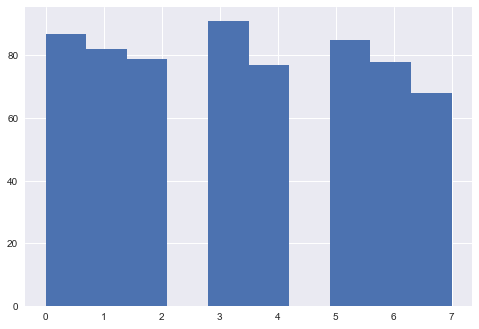

In [114]:
import seaborn as sns
plt.hist(passing_visits.values())

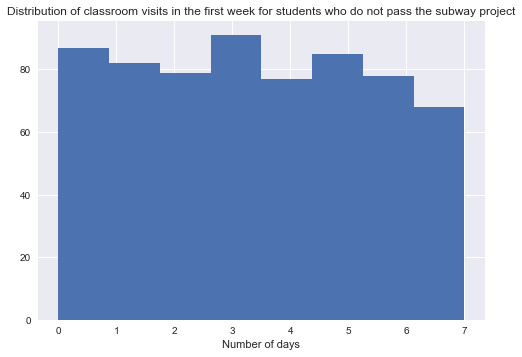

In [115]:
plt.hist(passing_visits.values(), bins=8) # use bin=8 to fix the blank
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')

(array([ 97.,  90.,  56.,   0.,  41.,  15.,   0.,  24.,  17.,   8.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

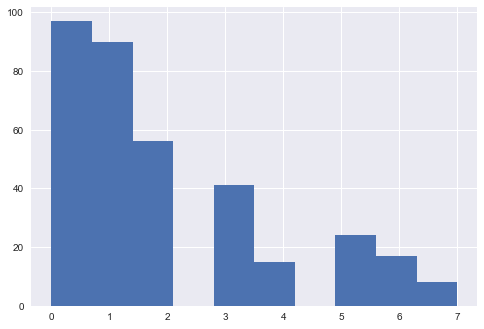

In [116]:
plt.hist(non_passing_visits.values())

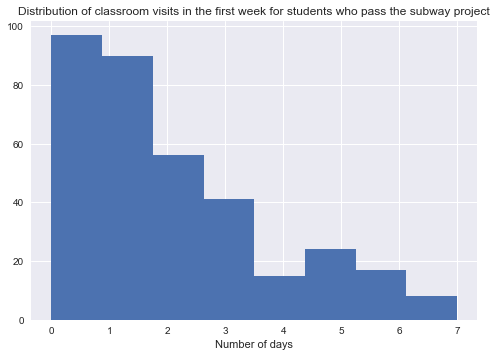

In [117]:
plt.hist(non_passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')